In [2]:
# импортируем библиотеку pandas для работы с датафреймами
import pandas as pd
# импортируем seaborn для визуализации
import seaborn as sns
# импортируем sklearn для кластеризации
from sklearn.cluster import KMeans 

# загружаем данные
df = pd.read_csv('pokemon.csv')
# датасет содержит название покемона, уровень его защиты, силу атаки и скорость


C:\Users\alexm\AppData\Local\Temp\ipykernel_16620\2214027174.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Таким образом, мы обучили модель кластеризации. Если нужно определить, к какому из существующих кластеров будут отнесены новые данные из df2, то мы просто воспользуемся методом predict:
X_new = df2[["x1", "x2", "x3"]]
k_means.predict(X_new)

Чтобы запустить алгоритм, необходимо задать параметры кластеризации:

n_clusters — количество кластеров. По умолчанию — 8.
init — способ инициализации центроидов. Есть две опции: random (выбирает центроиды случайным образом) и k-means++ (более «хитрый» алгоритм, который позволяет модели быстрее сходиться). По умолчанию используется k-means++.
n_init — количество случайных инициализаций алгоритма k-means. В конце будут выбраны те результаты, которые имеют наилучшие значения критерия k-means. По умолчанию n_init = 10.
max_iter — максимальное количество итераций алгоритма k-means при одном запуске. По умолчанию — 300.
random_state — параметр, который определяет генерацию случайных чисел для инициализации центроида. Чтобы детерминировать случайность, нужно задать какое-нибудь число.

У нас есть данные по покемонам. Для каждого покемона известны его сила атаки, уровень защиты, скорость бега и ещё пара параметров. Попробуем найти кластеры покемонов, основываясь на силе атаки и уровне защиты.


In [3]:
# импортируем библиотеку pandas для работы с датафреймами
import pandas as pd
# импортируем seaborn для визуализации
import seaborn as sns
# импортируем sklearn для кластеризации
from sklearn.cluster import KMeans 

# загружаем данные
df = pd.read_csv('pokemon.csv')
# датасет содержит название покемона, уровень его защиты, силу атаки и скорость
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1


<Axes: xlabel='Attack', ylabel='Defense'>

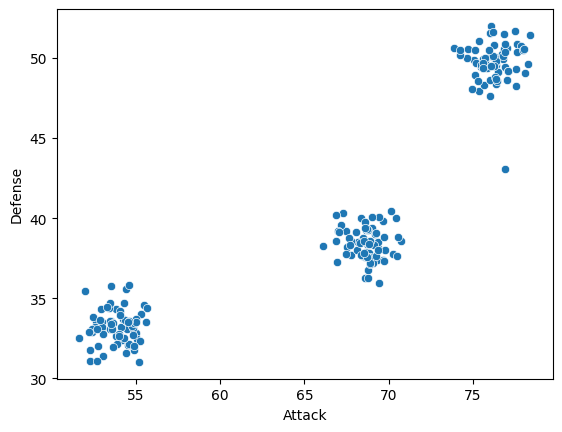

In [4]:
# попробуем кластеризовать покемонов по их силе атаки и уровню защиты
# для этого сохраним в матрицу X два интересующих нас признака: атаку и защиту
X = df[['Attack', 'Defense']]

# визуализируем
sns.scatterplot(x=df.Attack, y=df.Defense)

Из получившегося графика непонятно, сколько кластеров должно быть и как их выбрать. Попробуем разделить данные на три кластера.

Инициализируем алгоритм k-means. При инициализации зададим параметры моделирования:

n_clusters — количество кластеров;
init — стратегия кластеризации;
n_init — количество запусков алгоритма k-means;
random_state — чтобы результаты воспроизводились от запуска к запуску.

<Axes: xlabel='Attack', ylabel='Defense'>

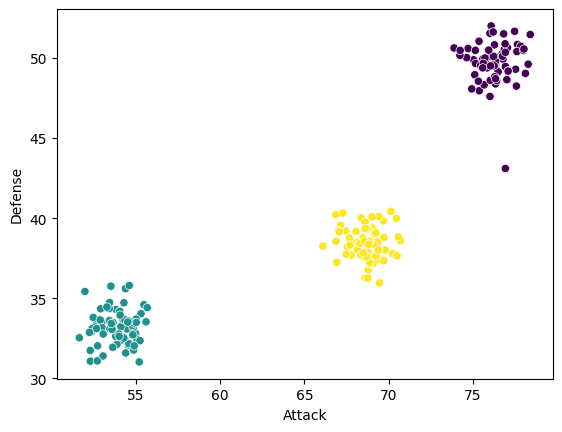

In [5]:
# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k3'] = predictions

#визуализируем результаты. Параметр c принимает вектор с номерами классов для группировки объектов по цветам 
sns.scatterplot(x=df.Attack, y=df.Defense, c=predictions)

В данном случае видно, что данные хорошо делятся на три кластера, а также есть одна точка-выброс. 

Попробуем увеличить количество кластеров до четырёх, чтобы вынести выброс в отдельный кластер:

<Axes: xlabel='Attack', ylabel='Defense'>

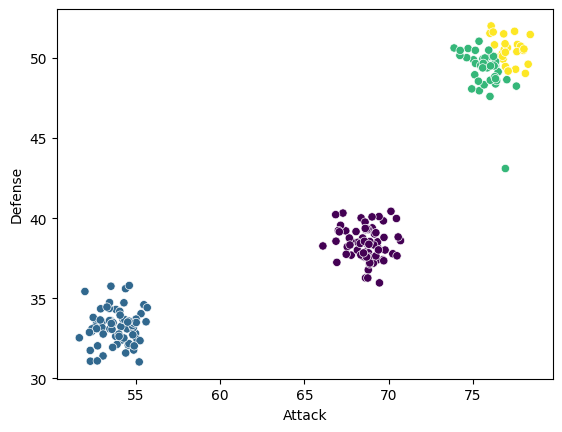

In [6]:
# инициализируем алгоритм k-means с количеством кластеров 4
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, то можно просто попросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k4'] = predictions

#визуализируем результаты, параметр c принимает вектор с номерами классов для группировки объектов по цветам 
sns.scatterplot(x=df.Attack, y=df.Defense, c=df.Clusters_k4)

Как видим, «отделить» выброс от других данных не получается: k-means не умеет обрабатывать выбросы.

In [7]:
#В трёхмерном и другом -мерном случае кластеризация запускается следующим образом:

# добавляем третий признак — скорость покемона, алгоритм такой же
#X = df[['Attack', 'Defense', 'Speed']]
 
# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
 
# запускаем обучение модели
kmeans.fit(X)
 
# предсказываем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

Методы визуализации результатов 3D-кластеризации мы рассмотрим чуть позже.

In [8]:
# передадим информацию о том, какие на самом деле должны быть кластеры и результаты предсказания
from sklearn.metrics.cluster import homogeneity_score
print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))

print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))


1.0
1.0


In [9]:
# посчитаем, насколько полными получились кластеры с покемонами
from sklearn.metrics.cluster import completeness_score
print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))

# посчитаем, насколько полными получились кластеры с покемонами
print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))


1.0
0.8334191510029214


In [10]:
# импортируем из библиотеки sklearn подсчёт V-меры
from sklearn.metrics import v_measure_score

# посчитаем V-меру для кластеров с покемонами
print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))

print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))


1.0
0.9091419717602737


ИЕРАРХИЧЕСКАЯ КЛАСТЕРИЗАЦИЯ

In [11]:
from sklearn.cluster import AgglomerativeClustering
agglomerative_clustering = AgglomerativeClustering(n_clusters=2)
agglomerative_clustering.fit(X)
agglomerative_clustering.labels_

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

EM кластеризация

In [12]:
# импортируем библиотеки numpy и sklearn
import numpy as np
from sklearn.mixture import GaussianMixture

gm_clustering = GaussianMixture(n_components=3, random_state=42)

# обучаем модель 
gm_clustering.fit(X)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(X)
gm_prediction

array([0, 2, 0, 0, 2, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2, 0, 1, 2, 2, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 0,
       0, 2, 1, 2, 2, 1, 0, 1, 2, 0, 1, 0, 0, 1, 2, 2, 2, 0, 1, 2, 2, 2,
       2, 1, 2, 0, 1, 1, 2, 2, 0, 2, 0, 2, 1, 0, 2, 2, 2, 2, 2, 1, 1, 1,
       0, 2, 0, 2, 1, 1, 0, 0, 2, 1, 2, 1, 0, 2, 2, 2, 1, 1, 0, 1, 1, 2,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1, 2, 2, 0, 2, 2, 0,
       0, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 2,
       2, 2, 2, 2, 1, 0, 2, 1, 2, 0, 2, 2, 1, 2, 0, 1, 0, 2, 2, 0, 0, 0,
       2, 1, 0, 0, 0, 0, 2, 1], dtype=int64)

СПЕКТРАЛЬНАЯ КЛАСТЕРИЗАЦИЯ

In [13]:
# вызываем из sklearn SpectralClustering 
from sklearn.cluster import SpectralClustering


# запускаем кластеризацию, задав количество кластеров, равное 3 
spectral_clustering = SpectralClustering(n_clusters=3, random_state=42)

spectral_clustering.fit(df[['Attack', 'Defense']])
# получаем результаты кластеризации
spectral_predictions = spectral_clustering.labels_

DBSCAN


<Axes: xlabel='year', ylabel='price'>

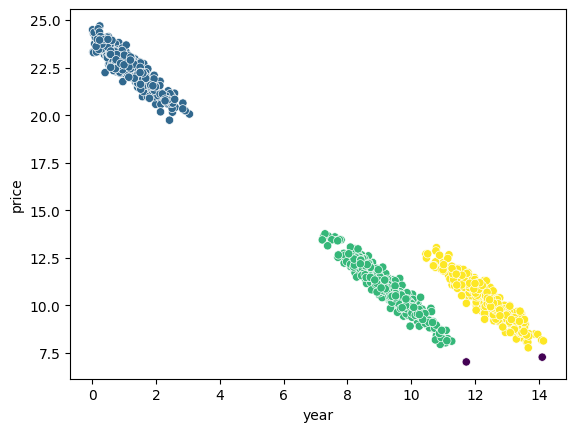

In [21]:
df1 = pd.read_csv('housing.csv')
# Импортируем DBSCAN-кластеризацию
from sklearn.cluster import DBSCAN

# Запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=0.5, min_samples=5).fit(df1[['year', 'price']])

# Далее можно визуализировать результаты, как мы делали это с алгоритмом k-means
sns.scatterplot(x=df1.year, y=df1.price, c=clustering.labels_)

В данном случае мы не задавали количество кластеров, алгоритм смог сам разделить данные. Также DBSCAN смог выделить выброс в данных.